<a href="https://colab.research.google.com/github/keremshns/tensorflow_developer/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


--2023-08-17 14:02:57--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2023-08-17 14:02:57 (4.46 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

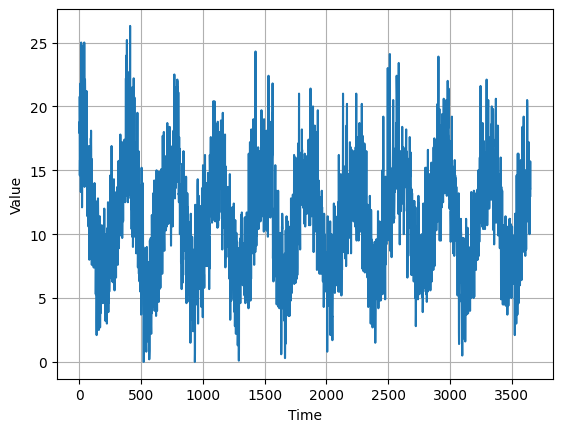

In [2]:
import csv

temps = []
dates = []
times = []

with open("/tmp/daily-min-temperatures.csv", "r") as csvfile:
  data = csv.reader(csvfile, delimiter=",")

  next(data)

  for row in data:
    dates.append(str(row[0]))
    temps.append(float((row[1])))

  temps = np.array(temps)

  for time, temps_copy in enumerate(temps):
    times.append(time+1)

  print(times)

plot_series(times, temps)




In [3]:
split_time = 2500
batch_size = 32
window_size = 10
shuffle_buffer_size = 1000

series_train = temps[:split_time]
series_val = temps[split_time:]
time_train = times[:split_time]
time_val = times[split_time:]



In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer_size):
  #expand dim gerekli mi?
  series = tf.expand_dims(series, axis=-1)
  data = tf.data.Dataset.from_tensor_slices(series)
  data = data.window(window_size+1, shift=1, drop_remainder=True)
  data = data.flat_map(lambda x: x.batch(batch_size+1))
  data = data.map(lambda x: (x[:-1], x[1:]))
  data = data.shuffle(shuffle_buffer_size).batch(batch_size)
  return data.prefetch(1)

print(windowed_dataset(series_train, window_size, batch_size, shuffle_buffer_size))


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2500,)
Epoch 1/100
78/78 [==============================] - 13s 33ms/step - loss: 10.7119 - mae: 11.2114 - lr: 1.0000e-08
Epoch 2/100
78/78 [==============================] - 2s 24ms/step - loss: 10.7118 - mae: 11.2113 - lr: 1.1220e-08
Epoch 3/100
78/78 [==============================] - 1s 16ms/step - loss: 10.7117 - mae: 11.2112 - lr: 1.2589e-08
Epoch 4/100
78/78 [==============================] - 1s 14ms/step - loss: 10.7116 - mae: 11.2111 - lr: 1.4125e-08
Epoch 5/100
78/78 [==============================] - 1s 14ms/step - loss: 10.7115 - mae: 11.2110 - lr: 1.5849e-08
Epoch 6/100
78/78 [==============================] - 2s 23ms/step - loss: 10.7113 - mae: 11.2108 - lr: 1.7783e-08
Epoch 7/100
78/78 [==============================] - 1s 14ms/step - loss: 10.7112 - mae: 11.2107 - lr: 1.9953e-08
Epoch 8/100
78/78 [=============

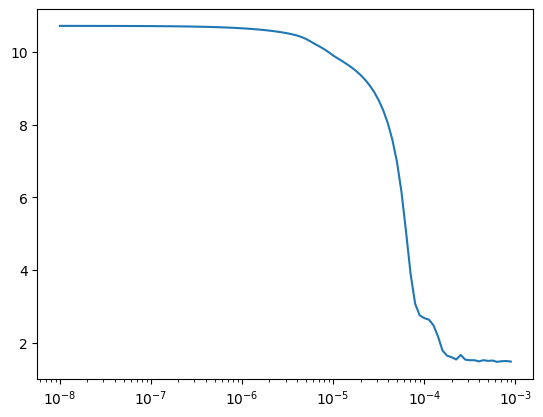

In [5]:
tf.keras.backend.clear_session()
"""tf.random.set_seed(51)
np.random.seed(51)"""

train_set = windowed_dataset(series_train,window_size, batch_size,shuffle_buffer_size)
print(train_set)
print(series_train.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(30, kernel_size=5, strides=1, padding="causal", input_shape=[None,1]),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))
epochs = 100
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8,momentum=0.9), metrics=["mae"])
history = model.fit(train_set, epochs=epochs, callbacks=[lr_schedule])

loss = history.history["loss"]
lr = history.history["lr"]

plt.semilogx(lr, loss)




<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2500,)
Epoch 1/100
78/78 [==============================] - 5s 15ms/step - loss: 5.5442 - mae: 6.0258
Epoch 2/100
78/78 [==============================] - 2s 23ms/step - loss: 2.3816 - mae: 2.8423
Epoch 3/100
78/78 [==============================] - 1s 15ms/step - loss: 1.6883 - mae: 2.1356
Epoch 4/100
78/78 [==============================] - 1s 14ms/step - loss: 1.5115 - mae: 1.9550
Epoch 5/100
78/78 [==============================] - 1s 15ms/step - loss: 1.4915 - mae: 1.9344
Epoch 6/100
78/78 [==============================] - 1s 14ms/step - loss: 1.4775 - mae: 1.9191
Epoch 7/100
78/78 [==============================] - 1s 14ms/step - loss: 1.4758 - mae: 1.9183
Epoch 8/100
78/78 [==============================] - 1s 15ms/step - loss: 1.4816 - mae: 1.9232
Epoch 9/100
78/78 [==============================] - 2s 23ms/step - los

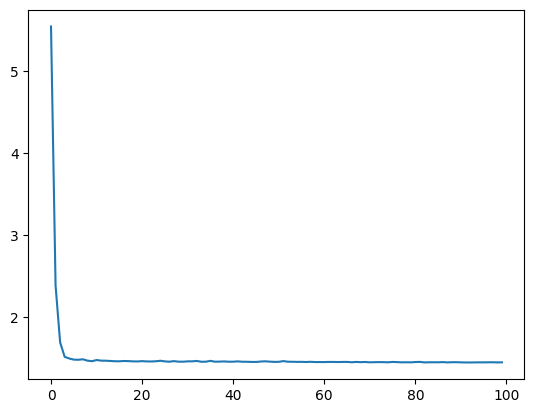

In [6]:
tf.keras.backend.clear_session()
train_set = windowed_dataset(series_train,window_size, batch_size,shuffle_buffer_size)
print(train_set)
print(series_train.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(30, kernel_size=5, strides=1, padding="causal", input_shape=[None,1]),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3 ,momentum=0.9), metrics=["mae"])
history = model.fit(train_set, epochs=epochs)

loss = history.history["loss"]

plt.plot(range(epochs), loss)


1/1 [==============================] - 0s 22ms/step


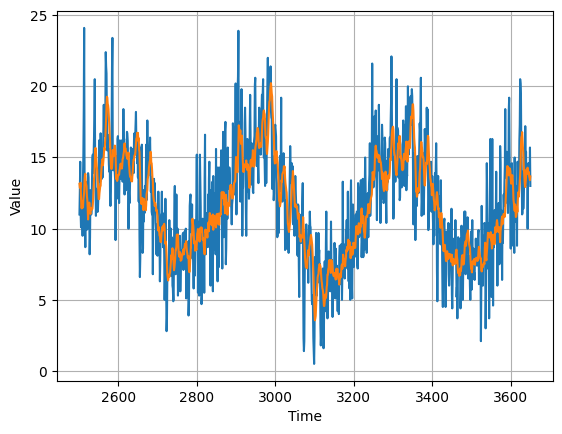

In [7]:
forecast = []

for time in range(len(temps)-window_size):
  forecast.append(model.predict(temps[time:time+window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:,0,0]



plot_series(time_val, series_val)
plot_series(time_val, results)

In [8]:
tf.keras.metrics.mean_absolute_error(series_val, results).numpy()


2.0328684